In [34]:
def lr_lambda(epoch : int) -> float:
    lr = 1
    if epoch < 5:
        return lr
    elif epoch < 10:
        return 0.8 * lr
    elif epoch < 15:
        return 0.5 * lr
    elif epoch < 20:
        return 0.1 * lr
    elif epoch < 30:
        return 0.07 * lr
    elif epoch < 80:
        return 0.05 * lr
    else:
        return 0.01 * lr

In [36]:
from matplotlib import pyplot as plt
import numpy as np


In [55]:
y

[1,
 1,
 1,
 1,
 1,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01]

In [58]:
1/(x+1)

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
       0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
       0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ,
       0.03846154, 0.03703704, 0.03571429, 0.03448276, 0.03333333,
       0.03225806, 0.03125   , 0.03030303, 0.02941176, 0.02857143,
       0.02777778, 0.02702703, 0.02631579, 0.02564103, 0.025     ,
       0.02439024, 0.02380952, 0.02325581, 0.02272727, 0.02222222,
       0.02173913, 0.0212766 , 0.02083333, 0.02040816, 0.02      ,
       0.01960784, 0.01923077, 0.01886792, 0.01851852, 0.01818182,
       0.01785714, 0.01754386, 0.01724138, 0.01694915, 0.01666667,
       0.01639344, 0.01612903, 0.01587302, 0.015625  , 0.01538462,
       0.01515152, 0.01492537, 0.01470588, 0.01449275, 0.01428571,
       0.01408451, 0.01388889, 0.01369863, 0.01351351, 0.01333

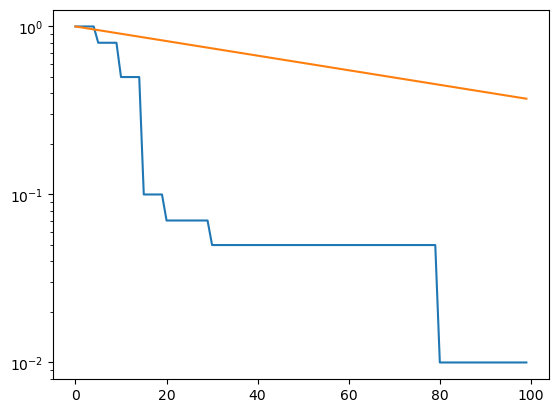

In [64]:
x = np.arange(0, 100, 1)
y = [lr_lambda(i) for i in x]

#* log scale y axis
plt.yscale("log")
plt.plot(x, y)
plt.plot(x, np.exp(-x/10))

In [10]:
import rms
reload(rms)

<module 'rms' from '/home/user/project/python/rmsKit/rms/__init__.py'>

In [11]:
ur = rms.unitary.UnitaryRiemanGenerator(8, jax.random.PRNGKey(0), np.float64)
u = ur.reset_matrix()

UnitaryRiemanGenerator is initialized


In [ ]:
import sys
sys.path.append("/home/user/project/python/rmsKit")
from jax_lattice import KH

p = dict(
    Jx=1,
    Jy=1,
    Jz=1,
    hx=0,
    hz=0,
)
H = KH.system([2, 2], "3site", p)

In [ ]:
import numpy as np
u = np.load("array/KH/3site/sel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/M_1/u/0.npy")
# U = np.kron(u,u)
# U = np.kron(U,U)

In [ ]:
state = rms.loss.init_loss(jnp.array(H), 8, np.float64, "sel", beta=1.0)
state_list = [state]
qesLoss = rms.loss.system_el_multi

In [ ]:
def loss(u):
    return qesLoss(state_list, jnp.array(u))

In [ ]:
%timeit loss(jnp.array(u)).block_until_ready()

In [ ]:
%%timeit 
v, g = jax.value_and_grad(loss)(jnp.array(u))
v.block_until_ready(), g.block_until_ready()

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/user/project/python/rmsKit")
import os
import torch
from lattice import KH
# # os.environ["CUDA_VISIBLE_DEVICES"] = ""
# # os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
import rms_torch
import numpy as np
# u = np.load("/home/user/project/python/rmsKit/array/KH/3site/sel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/M_1/u/0.npy")
u = np.load("/home/user/project/python/rmsKit/array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/M_1_e_50_lr_0.5/u/0.npy")
device = torch.device("cuda")
p = dict(
    Jx=1,
    Jy=1,
    Jz=1,
    hx=0,
    hz=0,
)
H = KH.system([2, 2], "3site", p)
# Create an instance of the CustomModel class
E, V = np.linalg.eigh(H)

/home/user/miniconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
H_gpu = torch.tensor(H, dtype=torch.float64, device=device)
model = rms_torch.UnitaryRieman(H.shape[0], 8, device=device, u0=u).to(device)
loss = rms_torch.SystemMinimumEnergyLoss(H, device=device).to(device)
compiled_model = torch.compile(model, dynamic = False, fullgraph=True)
compiled_loss = torch.compile(loss, dynamic = False, fullgraph=True)


TypeError: super(type, obj): obj must be an instance or subtype of type

In [6]:
# optimizer = rms_torch.Adam(compiled_model.parameters(), lr=1e-3, amsgrad=True)
optimizer = rms_torch.LION(model.parameters(), lr=1*1e-3)
num_epochs = 10
loss.initialize(model())

for epoch in range(num_epochs):
    # Zero out the gradients
    optimizer.zero_grad()

    # Forward pass
    output = model()
    _loss = loss(output)
    _loss.backward()
    for p in model.parameters():
        grad = p.grad  # Get the gradient from the compiled model
        if grad is not None:
            grad.data[:] = rms_torch.riemannian_grad_torch(p.data, grad)
        else:
            raise RuntimeError("No gradient for parameter")
    optimizer.step()
    print(f"Epoch: {epoch}, Loss: {_loss.item()}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4096x4096 and 81x81)

In [7]:
compiled_loss.V_old.shape

torch.Size([4096])

In [9]:
compiled_model().shape

torch.Size([4096, 4096])

In [32]:
z = 1

In [33]:
(z+2) if True else (z+3)

3

In [27]:
import os

import os
import re

def list_unitaries(path, n_percent=None, n_top=None, thres=None):
    loss_folders = [
        entry.path for entry in os.scandir(path) if entry.is_dir() and entry.name.startswith("loss_")
    ]

    def get_folder_number(folder_name):
        match = re.search(r"loss_(\d+\.\d+)", folder_name)
        if match:
            return float(match.group(1))
        return float("inf")

    loss_folders.sort(key=get_folder_number)
    selected_folders = [loss_folders for _ in range(3)]

    if n_percent is not None:
        if isinstance(n_percent, int) and 0 <= n_percent <= 100:
            num_folders = int(len(loss_folders) * n_percent / 100)
            selected_folders[0] = loss_folders[:num_folders]
        else:
            raise ValueError("Invalid n_percent value. Please enter an integer value between 0 and 100.")

    if n_top is not None:
        if isinstance(n_top, int) and 0 <= n_top <= len(loss_folders):
            selected_folders[1] = loss_folders[:n_top]
        else:
            raise ValueError("Invalid n_top value. Please enter an integer value between 0 and the total number of folders.")

    if thres is not None:
        if isinstance(thres, (int, float)):
            selected_folders[2] = [folder for folder in loss_folders if get_folder_number(folder) < thres]
        else:
            raise ValueError("Invalid threshold value. Please enter a valid number.")

    # 3つのリストのうち要素数が最も少ないものを選択
    result = min(selected_folders, key=len)
    return result

path = "../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5"  # ディレクトリのパスを指定してください
loss_folders = list_unitaries(path, n_top=10, thres=8.2)

for folder in loss_folders:
    print(folder)

../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_8.161143
../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_8.197812


In [12]:
li = list_unitaries("../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5")
sorted(li)[::-1]

['../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_9.977042',
 '../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_9.899173',
 '../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_9.791781',
 '../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_9.784688',
 '../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_9.730649',
 '../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_9.598964',
 '../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_9.577018',
 '../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_9.489171',
 '../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_9.450588',
 '../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_9.365743',
 '../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_9.275466',
 '../array/torch/KH/3site/sqel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/e_30_lr_0.5/loss_9.2

In [14]:
# optimizer = rms_torch.Adam(compiled_model.parameters(), lr=1e-3, amsgrad=True)
optimizer = rms_torch.LION(compiled_model.parameters(), lr=1*1e-3)
num_epochs = 10
compiled_loss.reset(compiled_model())

for epoch in range(num_epochs):
    # Zero out the gradients
    optimizer.zero_grad()

    # Forward pass
    output = compiled_model()
    _loss = compiled_loss(output)
    _loss.backward(retain_graph=True)
    for p in compiled_model.parameters():
        grad = p.grad  # Get the gradient from the compiled model
        if grad is not None:
            grad.data[:] = rms_torch.riemannian_grad_torch(p.data, grad)
        else:
            raise RuntimeError("No gradient for parameter")
    optimizer.step()
    print(f"Epoch: {epoch}, Loss: {_loss.item()}")

Epoch: 0, Loss: 8.004105424341045
Epoch: 1, Loss: 8.003236965858935
Epoch: 2, Loss: 8.003438837389412


KeyboardInterrupt: 

In [13]:
next(model.parameters())

Parameter containing:
tensor([[-2.5696e-01,  1.7097e-01,  1.9867e-01, -1.2842e-01, -1.0919e-01,
          6.8600e-01, -2.0272e-01, -5.7023e-01],
        [-3.8232e-02, -5.4888e-01,  1.9174e-01,  4.7085e-01,  2.6820e-01,
          4.8821e-01, -2.3459e-02,  3.5774e-01],
        [-3.5027e-01, -3.8501e-01, -1.0177e-01, -1.7628e-01, -3.0537e-01,
          3.9967e-02,  7.6094e-01, -1.1732e-01],
        [-8.9114e-02, -2.2356e-01, -7.4985e-01, -4.1507e-01,  3.4657e-01,
          1.9739e-01, -2.1377e-01,  5.2455e-02],
        [ 1.7096e-01, -1.5171e-01,  5.6047e-01, -7.0626e-01,  3.2317e-01,
          1.1962e-02,  6.7080e-02,  1.6045e-01],
        [-5.7808e-01, -3.9429e-01,  1.8568e-01,  3.4663e-02,  1.0437e-01,
         -4.8289e-01, -4.0521e-01, -2.5770e-01],
        [ 1.4227e-01, -3.0032e-01, -1.6723e-04, -2.2395e-01, -7.6582e-01,
          8.1621e-02, -4.0599e-01,  2.8538e-01],
        [-6.4671e-01,  4.5012e-01,  5.0319e-02, -9.1091e-02, -3.1170e-02,
          1.0248e-01, -1.0116e-02,  5.9729e

In [8]:
compiled_model.reset_params()
optimizer = rms_torch.LION(compiled_model.parameters(), lr=3*1e-4)
num_epochs = 1
for epoch in range(num_epochs):
    # Zero out the gradients
    optimizer.zero_grad()

    # Forward pass
    output = compiled_model()
    loss = compiled_loss(output)
    loss.backward()
    for p in model.parameters():
        grad = p.grad  # Get the gradient from the compiled model
        if grad is not None:
            grad.data[:] = rms_torch.riemannian_grad_torch(p.data, grad)
        else:
            raise RuntimeError("No gradient for parameter")
    optimizer.step()

    print(f"Epoch: {epoch}, Loss: {loss.item()}")

RuntimeError: No gradient for parameter

In [ ]:

from importlib import reload
import sys
sys.path.append("/home/user/project/python/rmsKit")
import rms

import jax 
import numpy as np
import jax.numpy as jnp

sys.path.append("/home/user/project/python/reduce_nsp")
sys.path.append("/home/user/project/python/exact")
import numpy as np

import os
groundstate = np.load("/home/user/project/python/exact/test/out/KH_2x2/Jx_1_Jy_1_Jz_1_h_0/groundstate.npy")
u = np.load("/home/user/project/python/rmsKit/array/KH/3site/sel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/M_1/u/0.npy")
H0 = -np.load("/home/user/project/python/rmsKit/array/KH/3site/none/Jx_1_Jy_1_Jz_1_hx_0_hz_0/H/0.npy")
H1 = -np.load("/home/user/project/python/rmsKit/array/KH/3site/none/Jx_1_Jy_1_Jz_1_hx_0_hz_0/H/1.npy")
H2 = -np.load("/home/user/project/python/rmsKit/array/KH/3site/none/Jx_1_Jy_1_Jz_1_hx_0_hz_0/H/2.npy")
x1 = groundstate.copy()
x0 = groundstate.reshape([8] * 4)
x0 = x0.transpose([0, 2, 1, 3]).reshape(-1)
x0 = jnp.array(x0)
# os.environ["CUDA_VISIBLE_DEVICES"] = ""
# os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
SH0 = rms.sum_ham(H0, [[0,2]], 4, 8)
SH1 = rms.sum_ham(H1, [[0,1]], 4, 8)
SH2 = rms.sum_ham(H2, [[0,3]], 4, 8)


In [ ]:
_bonds = [[0,0,2], [1,0,1], [2,0,3], [0,1,3], [1,1,0], [2,1,2], [0,2,0], [1,2,3], 
            [2,2,1], [0,3,1], [1,3,2], [2,3,0]]
bonds = [[], [], []]
for bond in _bonds:
    bonds[bond[0]].append(bond[1:])

_H = rms.sum_ham(rms.stoquastic(H0), bonds[0], 4, 8)
_H += rms.sum_ham(rms.stoquastic(H1), bonds[1], 4, 8)
_H += rms.sum_ham(rms.stoquastic(H2), bonds[2], 4, 8)

u2 = np.kron(u, u)
_HU = rms.sum_ham(rms.stoquastic(u2@H0@u2.T), bonds[0], 4, 8)
_HU += rms.sum_ham(rms.stoquastic(u2@H1@u2.T), bonds[1], 4, 8)
_HU += rms.sum_ham(rms.stoquastic(u2@H2@u2.T), bonds[2], 4, 8)

In [ ]:
U = np.kron(u,u)
U = np.kron(U,U)

SH = SH0 + SH1 + SH2

x = jnp.abs(U @ groundstate)
print(x @ _HU @ x)
x = jnp.abs(groundstate)
print(x @ rms.stoquastic(H) @ x)
# print(groundstate @ rms.stoquastic(H) @ groundstate)

# jnp.linalg.eigvalsh(rms.stoquastic(U @ H @ U.T))

-7.052132213843223
-6.22515992356388


In [ ]:
1.763032714130139 * 4

7.052130856520556

In [ ]:
np.linalg.norm(_H - rms.stoquastic(H))

1.579816545884742e-14

In [ ]:
jnp.linalg.eigvalsh(rms.stoquastic(H))

Array([-8.19503796, -7.8031308 , -7.8031308 , ...,  5.        ,
        6.        ,  6.        ], dtype=float64)

In [ ]:
jnp.linalg.eigvalsh(_H)

Array([-8.19503796, -7.8031308 , -7.8031308 , ...,  5.        ,
        6.        ,  6.        ], dtype=float64)

In [ ]:
jnp.linalg.eigvalsh(H)

Array([-5.44487522, -5.3283924 , -5.29823654, ...,  6.        ,
        6.        ,  6.        ], dtype=float64)

In [ ]:
state = rms.loss.init_loss(jnp.array(H1), 8, np.float64, "qes", X=jnp.array(x1))
qesLoss = rms.loss.qes_multi

qesLoss([state], jnp.array(u))

Array(0.52065724, dtype=float64)

## With Bug

In [ ]:
import torch
import numpy as np
from torch import nn
import math

u = np.load("/home/user/project/python/rmsKit/array/KH/3site/sel/Jx_1_Jy_1_Jz_1_hx_0_hz_0/M_1/u/0.npy")
device = torch.device("cuda")

def random_unitary_matrix(size, device):
    random_matrix = np.random.randn(size, size)
    q, _ = np.linalg.qr(random_matrix)
    return torch.tensor(u, dtype=torch.float64, device=device)

class CustomModel(nn.Module):
    def __init__(self, H_size, unitary_size):
        super(CustomModel, self).__init__()

        # Calculate the number of unitary matrices required to match the size of 'H'
        n_us = round(math.log2(H_size) / math.log2(unitary_size))
        self.n_us = n_us

        # Initialize the given number of random unitary matrices
        self.us = nn.ParameterList([nn.Parameter(random_unitary_matrix(unitary_size, device), requires_grad=True) for _ in range(n_us)])

    def forward(self):
        # Calculate U as the Kronecker product of all the unitary matrices in 'us'
        U = self.us[0]
        U = torch.kron(U, self.us[1])
        U = torch.kron(U, self.us[2])
        U = torch.kron(U, self.us[3])
        # for i in range(4):
        #     U = torch.kron(U, self.us[i+1])
        # for u in self.us[1:]:
        #     U = torch.kron(U, u)
        return U

def custom_loss(U, H):
    # Calculate U @ H @ U.T
    A = torch.matmul(U, torch.matmul(H, U.T))

    # Calculate the absolute value of the result
    a = torch.max(torch.diag(A)) * torch.eye(A.shape[0], device=device)
    result_abs = -torch.abs(A - a) + a

    # Calculate the minimum eigenvalue
    E = torch.linalg.eigvalsh(result_abs)
    z = torch.exp(-E * 1).sum()
    return torch.log(z)

p = dict(
    Jx=1,
    Jy=1,
    Jz=1,
    hx=0,
    hz=0,
)
H = KH.system([2, 2], "3site", p)

# Create an instance of the CustomModel class
model = CustomModel(H.shape[0], 8).to(device)
compiled_model = torch.compile(model, dynamic = False, fullgraph=True)
# Calculate the output
